# 데이터 시각화 및 분석
데이터는 KOSIS에서 제공한 **"인공지능 관련 인력 채용 시 주요 고려사항(년 2018~2021)"**을 사용하였다. 종사자규모별로 가장 많이 고려하는 사항 한가지를 선택한 후, 가장 많이 고려하는 사항 두 가지를 중복 선택하여 비율로 나타낸 데이터이다.

2018~2021년 자료에서 종사자규모에 따라 1순위로 고려하는 사항의 비율을 시각화하고 분석하였다.

https://kosis.kr/statHtml/statHtml.do?orgId=127&tblId=DT_127016_D005&vw_cd=MT_ZTITLE&list_id=N2_16_004&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [223]:
df = pd.read_excel("kosis_ai_data.xlsx", index_col='종사자규모별(1)')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [224]:
df

,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,...,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13
종사자규모별(1),,,,,,,,,,,,,,,,,,,,,
종사자규모별(1),1순위,1순위,1순위,1순위,1순위,1순위,1순위,1+2순위,1+2순위,1+2순위,...,1순위,1순위,1순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위
종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%),사례수 (개),학력 (%),전공학과 (%),...,자격증 (%),보유기술 (%),태도/성격 (%),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
전체,271,5.5,32.1,29.2,0.4,31.7,1.1,271,7.7,42.8,...,0.6,12.1,14.2,1915,10.9,24.8,75.8,4.1,53.3,31.1
"1,000인 이상",6,0,33.3,16.7,0,50,0,6,16.7,33.3,...,0,5.9,5.9,32,17.6,5.9,88.2,0,58.8,29.4
"100인 이상~1,000인 미만",20,15,30,35,0,20,0,20,15,55,...,0,13.4,15.2,213,11.6,20.5,75,2.7,59.8,30.4
10인 이상~100인 미만,150,6,36.7,26.7,0,30,0.7,150,8.7,46,...,0.7,11.4,14.7,1112,10.8,24.7,75.6,4.3,51.9,32.8
10인 미만,95,3.2,25.3,32.6,1.1,35.8,2.1,95,4.2,35.8,...,0.7,13.3,13.3,558,10.5,27.6,75.9,4.4,53.4,28.2


In [225]:
df.keys()

Index(['2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2018.12',
       '2018.13', '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5',
       '2019.6', '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2019.12',
       '2019.13', '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5',
       '2020.6', '2020.7', '2020.8', '2020.9', '2020.10', '2020.11', '2020.12',
       '2020.13', '2021', '2021.1', '2021.2', '2021.3', '2021.4', '2021.5',
       '2021.6', '2021.7', '2021.8', '2021.9', '2021.10', '2021.11', '2021.12',
       '2021.13'],
      dtype='object')

##### 1. 고려사항 중 기업에서 가장 중요하게 생각하는 것 한 가지 선택
##### 2. 고려사항 중 기업에서 가장 중요하게 생각하는 두 가지 선택
##### 연도별 비교, 종사자 규모별 비교

In [226]:
df_2018=df[['2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6', '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2018.12', '2018.13']] # 2018년 통계

In [227]:
df_2018

,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11,2018.12,2018.13
종사자규모별(1),,,,,,,,,,,,,,
종사자규모별(1),1순위,1순위,1순위,1순위,1순위,1순위,1순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위
종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
전체,271,5.5,32.1,29.2,0.4,31.7,1.1,271,7.7,42.8,72.7,1.5,67.9,7.4
"1,000인 이상",6,0,33.3,16.7,0,50,0,6,16.7,33.3,83.3,0,66.7,0
"100인 이상~1,000인 미만",20,15,30,35,0,20,0,20,15,55,65,0,50,15
10인 이상~100인 미만,150,6,36.7,26.7,0,30,0.7,150,8.7,46,70.7,1.3,65.3,8
10인 미만,95,3.2,25.3,32.6,1.1,35.8,2.1,95,4.2,35.8,76.8,2.1,75.8,5.3


In [228]:
df_2018.iloc[0] # 인덱스 0번 확인

2018         1순위
2018.1       1순위
2018.2       1순위
2018.3       1순위
2018.4       1순위
2018.5       1순위
2018.6       1순위
2018.7     1+2순위
2018.8     1+2순위
2018.9     1+2순위
2018.10    1+2순위
2018.11    1+2순위
2018.12    1+2순위
2018.13    1+2순위
Name: 종사자규모별(1), dtype: object

In [229]:
df_2018.iloc[0] == '1순위'

2018        True
2018.1      True
2018.2      True
2018.3      True
2018.4      True
2018.5      True
2018.6      True
2018.7     False
2018.8     False
2018.9     False
2018.10    False
2018.11    False
2018.12    False
2018.13    False
Name: 종사자규모별(1), dtype: bool

In [230]:
# 1순위가 포함된 행 필터링
first_2018= df_2018.loc[:, df_2018.iloc[0] == '1순위'] # 모든 행 선택하고 '1순위' 열만 남기기

In [231]:
first_2018

,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6
종사자규모별(1),,,,,,,
종사자규모별(1),1순위,1순위,1순위,1순위,1순위,1순위,1순위
종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
전체,271,5.5,32.1,29.2,0.4,31.7,1.1
"1,000인 이상",6,0,33.3,16.7,0,50,0
"100인 이상~1,000인 미만",20,15,30,35,0,20,0
10인 이상~100인 미만,150,6,36.7,26.7,0,30,0.7
10인 미만,95,3.2,25.3,32.6,1.1,35.8,2.1


In [232]:
first_2018.columns

Index(['2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6'], dtype='object')

In [233]:
first_2018.iloc[1]

2018         사례수 (개)
2018.1        학력 (%)
2018.2      전공학과 (%)
2018.3    경력, 경험 (%)
2018.4       자격증 (%)
2018.5      보유기술 (%)
2018.6     태도/성격 (%)
Name: 종사자규모별(1), dtype: object

In [234]:
first_2018.columns =  first_2018.iloc[1]

In [235]:
first_2018

종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
종사자규모별(1),,,,,,,
종사자규모별(1),1순위,1순위,1순위,1순위,1순위,1순위,1순위
종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
전체,271,5.5,32.1,29.2,0.4,31.7,1.1
"1,000인 이상",6,0,33.3,16.7,0,50,0
"100인 이상~1,000인 미만",20,15,30,35,0,20,0
10인 이상~100인 미만,150,6,36.7,26.7,0,30,0.7
10인 미만,95,3.2,25.3,32.6,1.1,35.8,2.1


In [236]:
first_2018 = first_2018[2:]

In [237]:
first_2018

종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
종사자규모별(1),,,,,,,
전체,271,5.5,32.1,29.2,0.4,31.7,1.1
"1,000인 이상",6,0,33.3,16.7,0,50,0
"100인 이상~1,000인 미만",20,15,30,35,0,20,0
10인 이상~100인 미만,150,6,36.7,26.7,0,30,0.7
10인 미만,95,3.2,25.3,32.6,1.1,35.8,2.1


In [238]:
# 나눔글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

In [239]:
plt.rc('font', family='NanumGothic')

In [240]:
first_2018.index.name = '종사자규모별'
first_2018.columns.name = '고려사항별'

In [241]:
first_2018

고려사항별,사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
종사자규모별,,,,,,,
전체,271,5.5,32.1,29.2,0.4,31.7,1.1
"1,000인 이상",6,0,33.3,16.7,0,50,0
"100인 이상~1,000인 미만",20,15,30,35,0,20,0
10인 이상~100인 미만,150,6,36.7,26.7,0,30,0.7
10인 미만,95,3.2,25.3,32.6,1.1,35.8,2.1


In [242]:
first_2018.index

Index(['전체', '1,000인 이상', '100인 이상~1,000인 미만', '10인 이상~100인 미만', '10인 미만'], dtype='object', name='종사자규모별')

In [243]:
first_2018.columns

Index(['사례수 (개)', '학력 (%)', '전공학과 (%)', '경력, 경험 (%)', '자격증 (%)', '보유기술 (%)',
       '태도/성격 (%)'],
      dtype='object', name='고려사항별')

<Axes: xlabel='종사자규모별'>

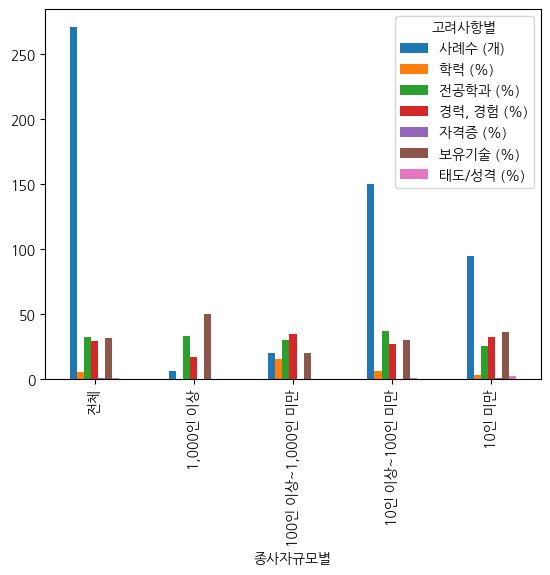

In [244]:
first_2018.plot(kind='bar', legend='인공지능 관련 인력 채용 시 주요 고려사항(2018년)')

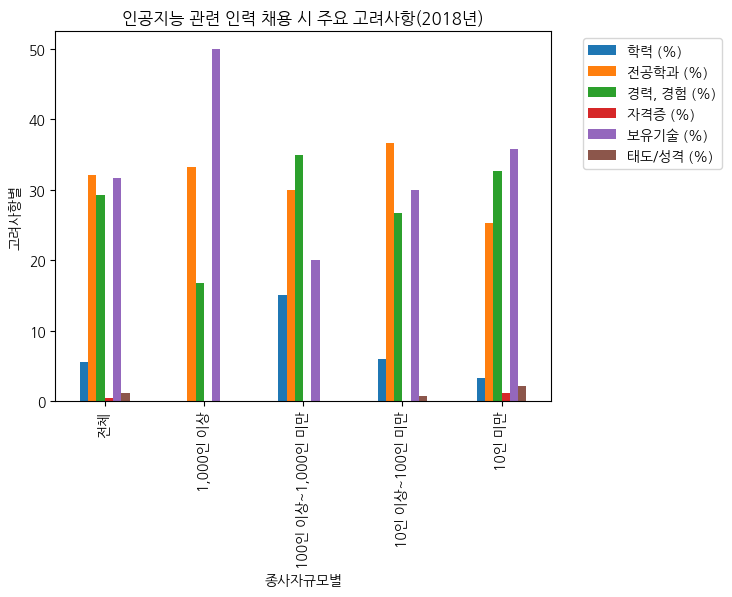

In [245]:
del first_2018['사례수 (개)']
first_2018.plot(kind='bar')
plt.xlabel('종사자규모별')
plt.ylabel('고려사항별')
plt.title('인공지능 관련 인력 채용 시 주요 고려사항(2018년)')

# 범례 위치 조정 (차트 밖으로 이동)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [246]:
df_2019=df[['2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6', '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2019.12', '2019.13']] # 2019년 통계

In [247]:
df_2019

,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13
종사자규모별(1),,,,,,,,,,,,,,
종사자규모별(1),1순위,1순위,1순위,1순위,1순위,1순위,1순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위
종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
전체,496,4,31.3,32.1,1,30,1.6,496,7.5,41.9,70.8,4,69.4,6.5
"1,000인 이상",9,0,44.4,0,0,55.6,0,9,0,44.4,66.7,0,88.9,0
"100인 이상~1,000인 미만",45,4.4,28.9,40,0,24.4,2.2,45,8.9,42.2,71.1,2.2,66.7,8.9
10인 이상~100인 미만,237,5.1,30.8,31.2,1.3,30,1.7,237,8.9,41.8,71.3,4.6,65.8,7.6
10인 미만,205,2.9,31.7,32.7,1,30.2,1.5,205,5.9,42,70.2,3.9,73.2,4.9


In [248]:
# 1순위가 포함된 행 필터링
first_2019= df_2019.loc[:, df_2019.iloc[0] == '1순위'] # 모든 행 선택하고 '1순위' 열만 남기기

first_2019.columns =  first_2019.iloc[1]
first_2019 = first_2019[2:]
first_2019.index.name = '종사자규모별'
first_2019.columns.name = '고려사항별'

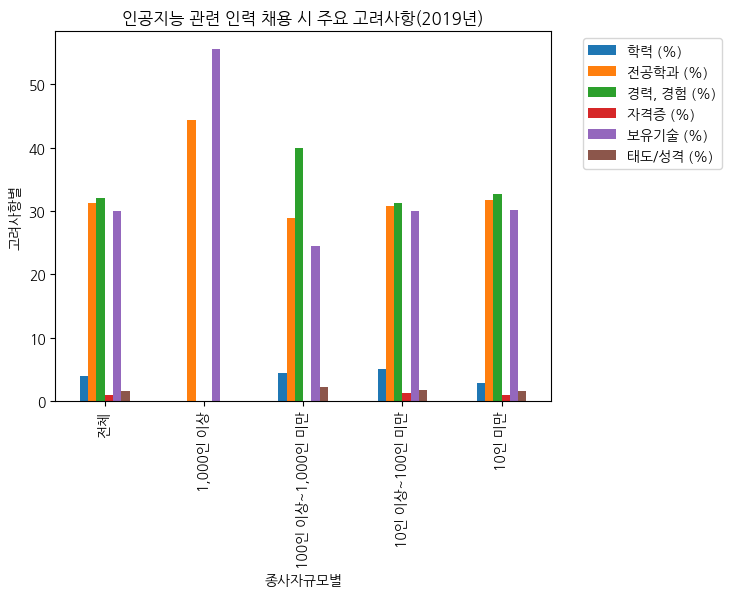

In [249]:
del first_2019['사례수 (개)']
first_2019.plot(kind='bar')
plt.xlabel('종사자규모별')
plt.ylabel('고려사항별')
plt.title('인공지능 관련 인력 채용 시 주요 고려사항(2019년)')

# 범례 위치 조정 (차트 밖으로 이동)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [250]:
df_2020=df[['2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5','2020.6', '2020.7', '2020.8', '2020.9', '2020.10', '2020.11', '2020.12', '2020.13']] # 2020년 통계
df_2020

,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13
종사자규모별(1),,,,,,,,,,,,,,
종사자규모별(1),1순위,1순위,1순위,1순위,1순위,1순위,1순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위
종사자규모별(1),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%),사례수 (개),학력 (%),전공학과 (%),"경력, 경험 (%)",자격증 (%),보유기술 (%),태도/성격 (%)
전체,1365,3.6,22.9,39.7,1.7,30.2,1.9,1365,5.2,33.9,73.3,7.7,70.2,9
"1,000인 이상",24,0,25.9,39.7,0,34.4,0,24,0,31.9,80.1,0,88,0
"100인 이상~1,000인 미만",141,6.8,17.5,44.9,2.1,28.6,0,141,12.3,28.9,72,8.9,70,7.9
10인 이상~100인 미만,761,3.3,24.9,36.1,1.6,31.2,2.9,761,4.4,32.5,73.2,7.4,71.2,10.3
10인 미만,439,3.2,21.1,44.3,1.8,28.7,0.9,439,4.5,38.1,73.5,8.1,67.7,7.7


In [251]:
# 1순위가 포함된 행 필터링
first_2020= df_2020.loc[:, df_2020.iloc[0] == '1순위'] # 모든 행 선택하고 '1순위' 열만 남기기

first_2020.columns =  first_2020.iloc[1]
first_2020 = first_2020[2:]
first_2020.index.name = '종사자규모별'
first_2020.columns.name = '고려사항별'

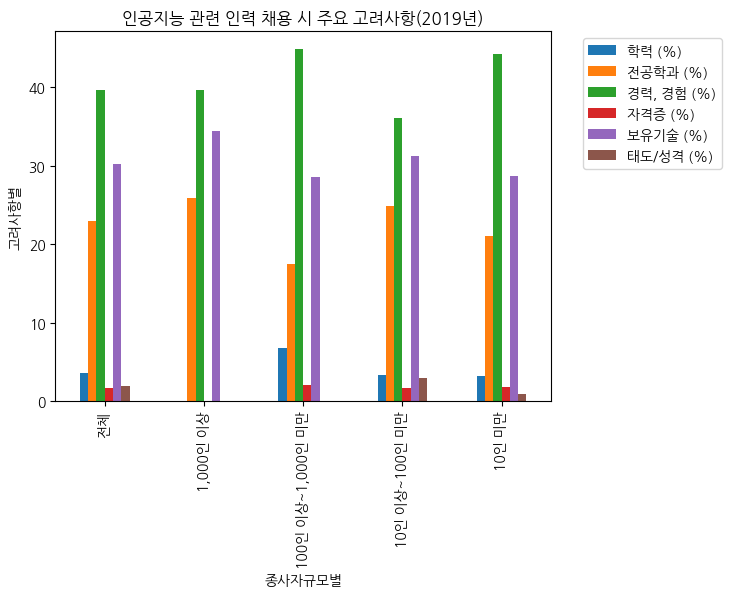

In [252]:
del first_2020['사례수 (개)']
first_2020.plot(kind='bar')
plt.xlabel('종사자규모별')
plt.ylabel('고려사항별')
plt.title('인공지능 관련 인력 채용 시 주요 고려사항(2019년)')

# 범례 위치 조정 (차트 밖으로 이동)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 반복되는 Task이므로 함수로 만들었다.

In [253]:
def make_chart(df, year):
  # 1순위가 포함된 행 필터링
  df= df.loc[:, df.iloc[0] == '1순위'] # 모든 행 선택하고 '1순위' 열만 남기기

  df.columns =  df.iloc[1]
  df = df[2:]
  df.index.name = '종사자규모별'
  df.columns.name = '고려사항별'

  del df['사례수 (개)']
  df.plot(kind='bar')
  plt.xlabel('종사자규모별')
  plt.ylabel('고려사항별')
  plt.title(f'인공지능 관련 인력 채용 시 주요 고려사항({year}년)')

  # 범례 위치 조정 (차트 밖으로 이동)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [254]:
# 다음을 실행하면 된다.
# make_chart(df, 2023)
# plt.show()

In [255]:
df1 = df[['2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6', '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2018.12', '2018.13']]
df2 = df[['2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6', '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2019.12', '2019.13']]
df3 = df[['2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5','2020.6', '2020.7', '2020.8', '2020.9', '2020.10', '2020.11', '2020.12', '2020.13']]
df4 = df[['2021', '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7', '2021.8', '2021.9', '2021.10', '2021.11', '2021.12', '2021.13']]

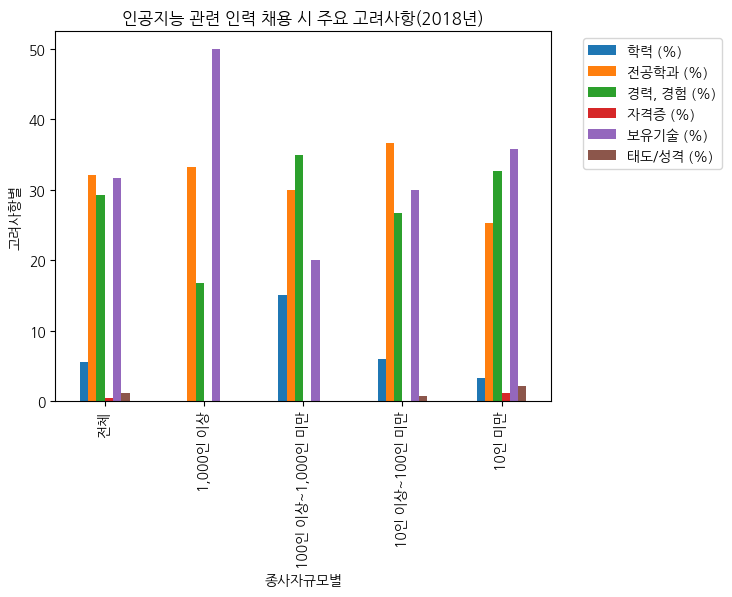

In [256]:
make_chart(df1, 2018)
plt.show()

##### 2018년 인공지능 관련 인력 채용 시, 전반적으로 전공학과, 보유기술, 경력 및 경험 순으로 고려하는 것으로 나타났다. 특히 종사자 1,000인 이상의 대규모 기업에서 다른 사항과 비교하여 보유 기술을 매우 중요하게 생각하였다. 반면 100인 이상 1,000인 미만 규모의 중기업 및 중견 기업에서는 경력과 경험을 가장 우선적으로 고려하는 경우가 많았다. 10인 이상 100인 미만의 중소기업에서는 전공학과를 주요 고려사항으로 생각하였으며 10인 미만의 스타트업의 경우 보유 기술과 경력 및 경험을 우선시하였다.

##### 이러한 현상은 기업 규모와 업무 특성, 산업 특성, 경쟁 상황, 기술 발전과 산업 동향 등의 요인들이 작용한 것으로 보인다.

##### 2018년에는 인공지능 기술의 발전이 가속화되었고 이에 따라 인공지능 기술을 보유한 인력을 우선적으로 채용한 것으로 보인다. 또한 인공지능 교육이 보편화되지 않았고 전공 학과가 개설된지 몇 년 되지 않았기 때문에 교육받은 전공자에 대한 기대가 컸던 것으로 보인다.

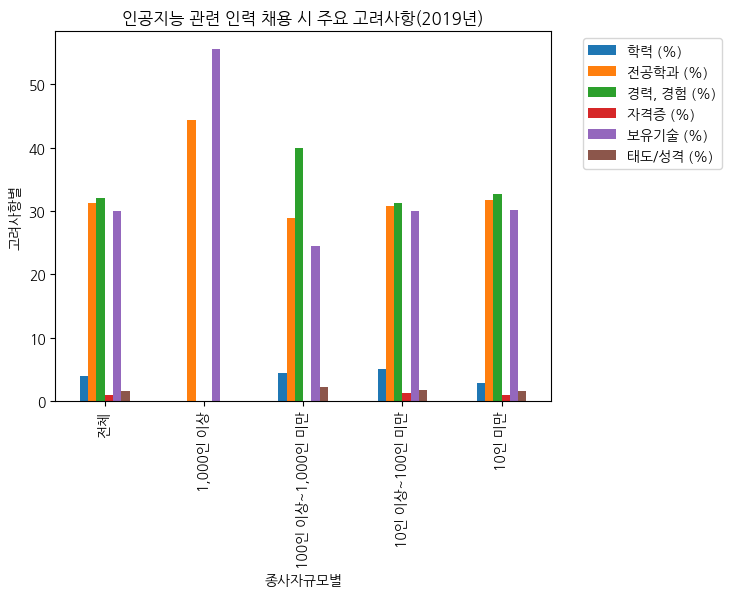

In [257]:
make_chart(df2, 2019)
plt.show()

##### 2019년 인공지능 관련 인력 채용 시, 전반적으로 경력 및 경험, 전공학과, 보유기술 순으로 고려하는 것으로 나타났다. 특히 종사자 1,000인 이상의 대규모 기업에서 2018년 보유 기술을 중요하게 생각했던 것과 달리 경력과 경험을 더 우선시하였다. 100인 이상 1,000인 미만 규모의 중기업 및 중견 기업에서도 이전에 전공학과를 더 우선시 했던 것과 달리 경력과 경험을 더 중요하게 고려하였다. 10인 이상 100인 미만의 중소기업과 10인 미만의 스타트업에서는 경력과 경험, 전공학과, 보유기술 이 세 가지 사항의 중요도가 비슷하게 나타났다. 이는 다수의 중소기업이 전년 대비 지원자의 경력과 경험이 고려 사항에서 더 우선하다는 생각으로 바뀐듯 하다.

##### 2019년에는 기업들의 인공지능 투자가 확대되었고 인공지능 기술을 활용한 다양한 서비스와 제품이 개발되었다. 자율주행차의 기술과 자연어 처리 기술이 비약적으로 향상되었으며 의료 분야에서도 인공지능 기술이 활용됨에 따라 인공지능 관련 인력에 대한 수요가 급증하였다.

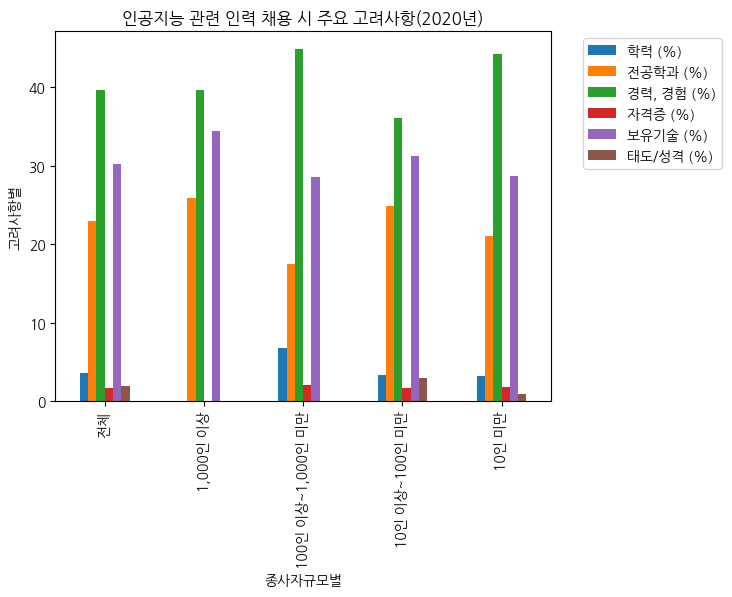

In [258]:
make_chart(df3, 2020)
plt.show()

##### 2020년 인공지능 관련 인력 채용 시, 경력 및 경험이 큰 폭으로 우선시되는 것으로 나타났으며 보유기술과 전공학과가 뒤를 이었다. 전년에 비해 특히 경력과 경험, 보유기술에 대한 중요성이 크게 향상되었으며 오히려 전공학과의 경우 고려 사항에서 큰 폭을 차지하긴 하나 전년 대비 크게 중요도가 감소하였다. 이제 종사자규모와 관계 없이 모든 규모의 기업에서 경력과 경험을 가장 우선적으로 생각하였으며 다음으로는 보유기술을 손꼽았다. 전공학과에 대한 중요도는 전년 대비 10%이상 낮아졌다.

##### 인공지능 기술의 발전이 급속도로 이루어져 새로운 기술이 빠르게 등장함으로써 실무 경험이 중요한 역량 요소로 간주되는 것으로 보인다. 그리고 인공지능 분야의 경쟁이 치열해져서 이러한 상황에서 기업들은 더 경쟁력 있는 인재를 채용하고자 하였다.

##### 또한 인공지능 기술은 다양한 산업 분야에 적용되고 있으며, 이에 따라 기업들은 특정 분야에 대한 전문성보다는 다양한 영역에 대응할 수 있는 인재를 채용하려는 경향이 나타난다. 따라서 전공학과보다는 경험과 보유기술에 더욱 중점을 두었다.

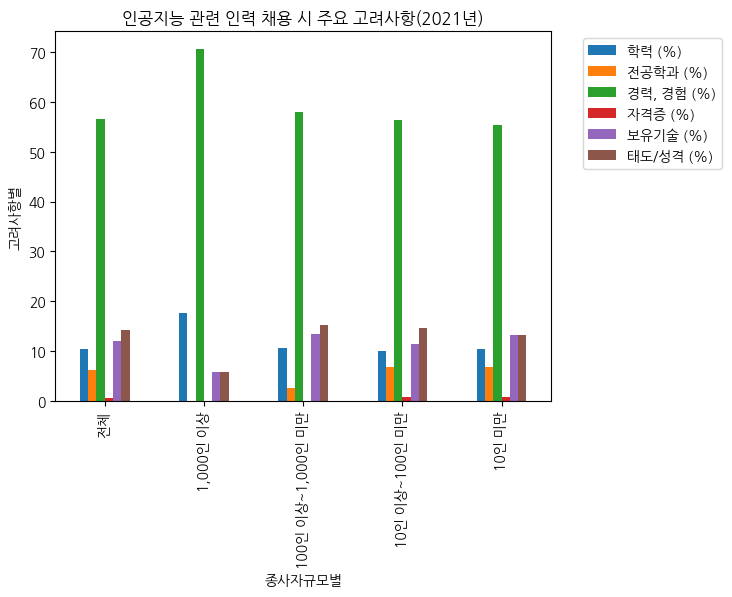

In [259]:
make_chart(df4, 2021)
plt.show()

##### 앞서 2018~2020년 경력 및 경험이 점점 더 중요하게 고려되는 것으로 나타났다. 2021년 인공지능 관련 인력 채용 시, 전년보다도 더 경력 및 경험이 큰 폭으로 우선시되는 것으로 나타났으며 보유기술과 전공학과는 2018년 대비 20% 감소, 2021년 대비 10% 감소하여 태도/성격, 학력 등의 다른 고려사항과 비슷한 수준이 되어 전반적으로 고려하는 사항으로는 볼 수 없게 되었다.

##### 2021년에는 전년에 비해 인공지능 기술이 더욱 발전하고 다양한 산업 분야에 적용이 되었으며 인공지능 관련 채용 시장이 더욱 치열해졌다. 기업들은 실무에 바로 투입될 수 있는 경력자들에 관심을 쏟았다. 실제 프로젝트나 인공지능 대회 경험이 있는 인재들을 우대하고, 보유기술보다는 적응력과 문제 해결 능력을 강조하는 경향이 나타났다.